In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib as mpl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pickle

In [2]:
df_mall = pd.read_csv('D:/PYTN 098/Mall_Customers.csv', sep=',')
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df_mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df_mall.isnull().sum().sum()

0

In [6]:
df_mall = df_mall.rename(columns={'Age': 'Umur', 'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})
df_mall.head()

,CustomerID,Gender,Umur,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df_age_cust = df_mall[['Umur', 'Score']]

<Axes: xlabel='Umur', ylabel='Score'>

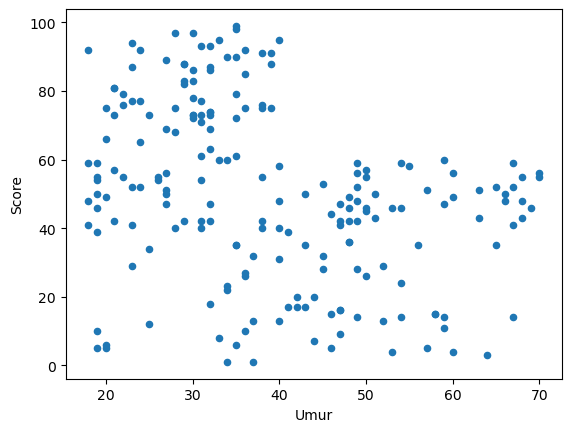

In [8]:
df_age_cust.plot(kind="scatter", x="Umur", y="Score")

Dari sebaran data berdasarkan plot diatas, terlihat sebaran data tertinggi antara Umur dan Score berada di range Umur 20 - 40 dengan Score 60 - 100

In [9]:
df_income_cust = df_mall[['Income', 'Score']]

<Axes: xlabel='Income', ylabel='Score'>

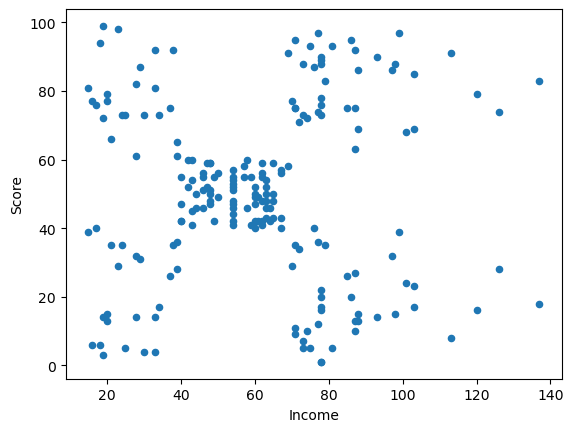

In [10]:
df_income_cust.plot(kind="scatter", x="Income", y="Score")

Dari sebaran data berdasarkan plot diatas, terlihat sebaran data tertinggi antara Income dan Score berada di range Income 40 - 80 dengan Score 40 - 60

In [11]:
df_age_income = df_mall[['Umur', 'Income']]

<Axes: xlabel='Umur', ylabel='Income'>

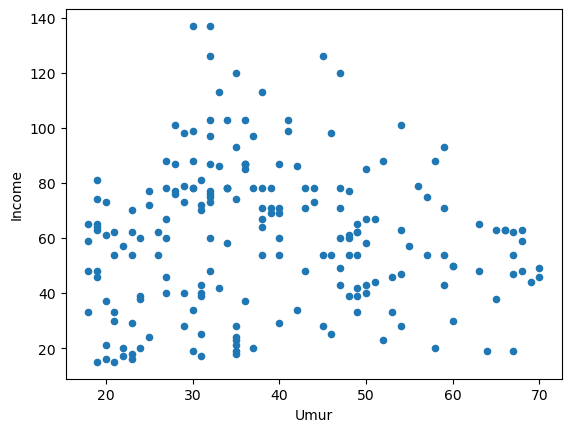

In [12]:
df_age_income.plot(kind="scatter", x="Umur", y="Income")

Dari sebaran data berdasarkan plot diatas, terlihat sebaran data cukup merata di segala Umur dengan Income berada di antara 20 - 100

In [13]:
kelompok_umur = df_mall.groupby('Umur').size().reset_index(name='Jumlah_Cust')
kelompok_umur.head()

,Umur,Jumlah_Cust
0,18,4
1,19,8
2,20,5
3,21,5
4,22,3


In [14]:
jumlah_data_umur = kelompok_umur['Jumlah_Cust'].sum()
print(f"Jumlah customer dalam kolom 'Umur': {jumlah_data_umur}")

Jumlah customer dalam kolom 'Umur': 200


In [15]:
kelompok_umur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Umur         51 non-null     int64
 1   Jumlah_Cust  51 non-null     int64
dtypes: int64(2)
memory usage: 944.0 bytes


In [16]:
kelompok_umur['Umur'] = kelompok_umur['Umur'].astype(str)

In [17]:
kelompok_umur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Umur         51 non-null     object
 1   Jumlah_Cust  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


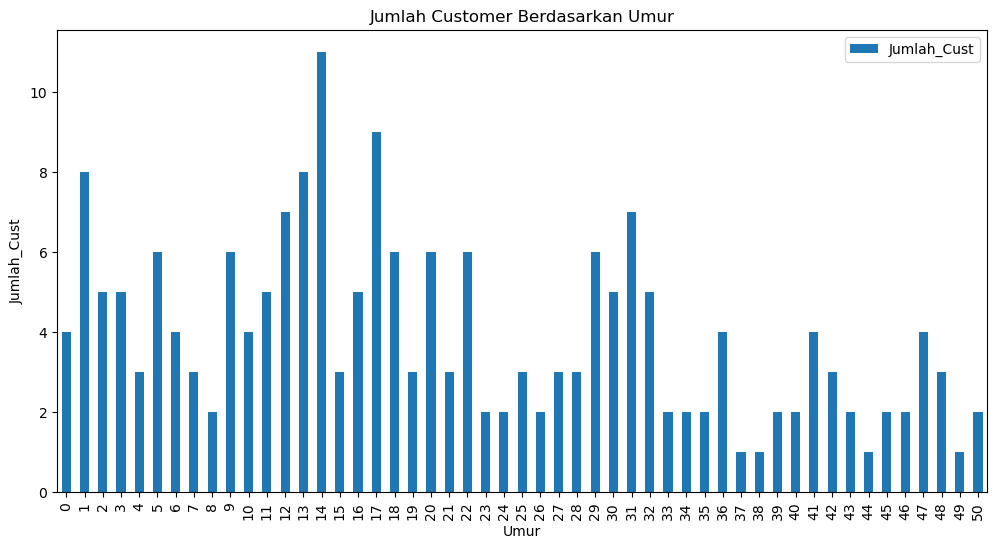

In [18]:
kelompok_umur.plot(kind="bar", figsize=(12,6))

plt.title("Jumlah Customer Berdasarkan Umur")
plt.ylabel("Jumlah_Cust")
plt.xlabel("Umur")
plt.show()

Dari Chart diatas, dapat disimpulkan bahwa Customer Mall terbanyak berada di Umur 14 dan 17 tahun yaitu usia remaja.

In [19]:
kelompok_gender = df_mall['Gender'].value_counts()
kelompok_gender.head()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [20]:
kelompok_gender.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, Female to Male
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 32.0+ bytes


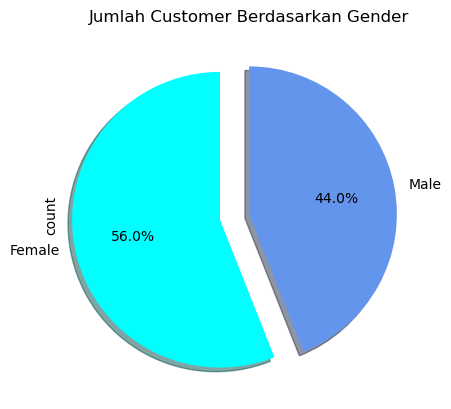

In [21]:
kelompok_gender.plot(kind="pie",
                 autopct='%1.1f%%', 
                 startangle=90,     
                 shadow=True,      
                 colors=["cyan", "cornflowerblue"],
                 explode=[0.2, 0]
                )

plt.title("Jumlah Customer Berdasarkan Gender")
plt.show()

Berdasarkan Pie Chart diatas, dapat diketahui bahwa jumlah Customer Mall terbanyak yaitu Wanita dengan 56% sedangkan Pria lebih sedikit dengan 44%

In [22]:
df_mall.head()

,CustomerID,Gender,Umur,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
X = df_mall[['Umur', 'Income']]
Y = df_mall['Gender']

le = LabelEncoder()
le.fit(Y)

Y_encoded = le.transform(Y)
print(le.classes_)

['Female' 'Male']


In [24]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X, Y)

KNeighborsClassifier()

In [25]:
def ConfusionMatrix(target_asli, hasil_prediksi, jumlah_kategori=2, judul_grafik="", label=False):
  if (label == False): label = range(jumlah_kategori)
  cm = confusion_matrix(target_asli, hasil_prediksi)

  fig, ax = plt.subplots(figsize=(jumlah_kategori+1, jumlah_kategori+1))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.yaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")
  ax.set_ylim(jumlah_kategori-0.5, -0.5)
  for i in range(jumlah_kategori):
      for j in range(jumlah_kategori):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

  plt.title(judul_grafik)
  plt.show()

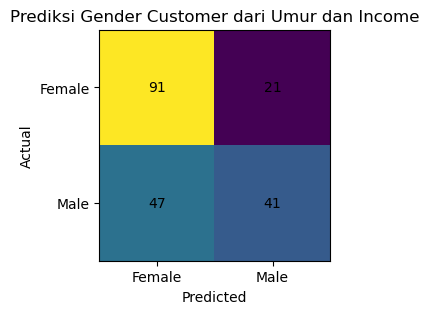

In [27]:
ConfusionMatrix(Y,
                    model_KNN.predict(X),
                    2,
                    "Prediksi Gender Customer dari Umur dan Income",
                     ['Female', 'Male']
                    )

In [28]:
print(classification_report(Y, model_KNN.predict(X)))

              precision    recall  f1-score   support

      Female       0.66      0.81      0.73       112
        Male       0.66      0.47      0.55        88

    accuracy                           0.66       200
   macro avg       0.66      0.64      0.64       200
weighted avg       0.66      0.66      0.65       200



In [31]:
fitur = df_mall[["Umur", "Income"]]
target = df_mall['Gender']

In [36]:
model = KNeighborsClassifier()
model.fit(fitur, target)

KNeighborsClassifier()

In [37]:
pickle.dump(model, open("model_customer_KNN.pkl", "wb"))

In [38]:
model_play = pickle.load(open("model_customer_KNN.pkl", "rb"))
model_play

KNeighborsClassifier()

In [39]:
model_play.predict([[1,0]])

c:\Users\ridar\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Female'], dtype=object)